In [88]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten


In [89]:
# load dataset
dataset = np.genfromtxt('updated_dataset.csv', delimiter=',', skip_header=1, filling_values=np.nan)
n_features = 6
dataset

array([[1.00000000e+00, 5.87942500e+03, 1.48532250e+04, 4.57450000e+03,
        4.57450000e+03, 2.28562250e+03],
       [2.00000000e+00, 6.26040000e+03, 1.79759750e+04, 5.21787500e+03,
        5.21787500e+03, 2.09721250e+03],
       [3.00000000e+00, 6.26907500e+03, 1.92073000e+04, 5.31452500e+03,
        5.31452500e+03, 2.00819250e+03],
       ...,
       [2.20000000e+01, 6.48265000e+03, 1.16223000e+04, 5.30714750e+03,
        5.30714750e+03, 3.01256500e+03],
       [2.30000000e+01, 5.97385000e+03, 1.41604500e+04, 4.11580000e+03,
        4.11580000e+03, 2.53196250e+03],
       [2.40000000e+01, 6.05008333e+03, 1.82398667e+04, 4.77471667e+03,
        4.77471667e+03, 2.01645500e+03]])

In [90]:
# print the shape and contents of dataset
print('dataset shape:', dataset.shape)
print('dataset contents:', dataset)

dataset shape: (8760, 6)
dataset contents: [[1.00000000e+00 5.87942500e+03 1.48532250e+04 4.57450000e+03
  4.57450000e+03 2.28562250e+03]
 [2.00000000e+00 6.26040000e+03 1.79759750e+04 5.21787500e+03
  5.21787500e+03 2.09721250e+03]
 [3.00000000e+00 6.26907500e+03 1.92073000e+04 5.31452500e+03
  5.31452500e+03 2.00819250e+03]
 ...
 [2.20000000e+01 6.48265000e+03 1.16223000e+04 5.30714750e+03
  5.30714750e+03 3.01256500e+03]
 [2.30000000e+01 5.97385000e+03 1.41604500e+04 4.11580000e+03
  4.11580000e+03 2.53196250e+03]
 [2.40000000e+01 6.05008333e+03 1.82398667e+04 4.77471667e+03
  4.77471667e+03 2.01645500e+03]]


In [91]:
# remove rows with NaN values
dataset = dataset[~np.isnan(dataset).any(axis=1)]
dataset
     

array([[1.00000000e+00, 5.87942500e+03, 1.48532250e+04, 4.57450000e+03,
        4.57450000e+03, 2.28562250e+03],
       [2.00000000e+00, 6.26040000e+03, 1.79759750e+04, 5.21787500e+03,
        5.21787500e+03, 2.09721250e+03],
       [3.00000000e+00, 6.26907500e+03, 1.92073000e+04, 5.31452500e+03,
        5.31452500e+03, 2.00819250e+03],
       ...,
       [2.20000000e+01, 6.48265000e+03, 1.16223000e+04, 5.30714750e+03,
        5.30714750e+03, 3.01256500e+03],
       [2.30000000e+01, 5.97385000e+03, 1.41604500e+04, 4.11580000e+03,
        4.11580000e+03, 2.53196250e+03],
       [2.40000000e+01, 6.05008333e+03, 1.82398667e+04, 4.77471667e+03,
        4.77471667e+03, 2.01645500e+03]])

In [92]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
test
train

array([[1.0000000e+00, 5.8794250e+03, 1.4853225e+04, 4.5745000e+03,
        4.5745000e+03, 2.2856225e+03],
       [2.0000000e+00, 6.2604000e+03, 1.7975975e+04, 5.2178750e+03,
        5.2178750e+03, 2.0972125e+03],
       [3.0000000e+00, 6.2690750e+03, 1.9207300e+04, 5.3145250e+03,
        5.3145250e+03, 2.0081925e+03],
       ...,
       [1.1000000e+01, 1.1239875e+04, 1.5978500e+04, 1.0163375e+04,
        1.0163375e+04, 2.8441150e+03],
       [1.2000000e+01, 1.1001325e+04, 1.5663125e+04, 1.0017775e+04,
        1.0017775e+04, 2.7893275e+03],
       [1.3000000e+01, 1.1008400e+04, 1.5611475e+04, 1.0052550e+04,
        1.0052550e+04, 2.7881100e+03]])

In [93]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)
     


In [94]:
look_back = 12

In [95]:
# prepare the training data
trainX, trainY = [], []
for i in range(look_back, len(train)):
    trainX.append(train[i-look_back:i, :n_features])
    trainY.append(train[i, n_features - 1])
trainX, trainY = np.array(trainX), np.array(trainY)


In [96]:
# prepare the testing data
testX, testY = [], []
for i in range(look_back, len(test)):
    testX.append(test[i-look_back:i, :n_features])
    testY.append(test[i, n_features - 1])
testX, testY = np.array(testX), np.array(testY)

In [97]:
# build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
# train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)


Epoch 1/10
184/184 - 6s - loss: 0.0044 - val_loss: 0.0133 - 6s/epoch - 34ms/step
Epoch 2/10
184/184 - 2s - loss: 0.0022 - val_loss: 0.0092 - 2s/epoch - 13ms/step
Epoch 3/10
184/184 - 2s - loss: 0.0017 - val_loss: 0.0081 - 2s/epoch - 13ms/step
Epoch 4/10
184/184 - 2s - loss: 0.0014 - val_loss: 0.0065 - 2s/epoch - 13ms/step
Epoch 5/10
184/184 - 3s - loss: 0.0014 - val_loss: 0.0068 - 3s/epoch - 18ms/step
Epoch 6/10
184/184 - 3s - loss: 0.0014 - val_loss: 0.0062 - 3s/epoch - 14ms/step
Epoch 7/10
184/184 - 2s - loss: 0.0013 - val_loss: 0.0068 - 2s/epoch - 14ms/step
Epoch 8/10
184/184 - 2s - loss: 0.0013 - val_loss: 0.0064 - 2s/epoch - 14ms/step
Epoch 9/10
184/184 - 2s - loss: 0.0013 - val_loss: 0.0065 - 2s/epoch - 13ms/step
Epoch 10/10
184/184 - 3s - loss: 0.0013 - val_loss: 0.0067 - 3s/epoch - 19ms/step


In [99]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

90/90 [==============================] - 1s 7ms/step


In [100]:
# calculate the root mean squared error
trainScore = np.sqrt(np.mean(np.square(trainY[0] - trainPredict[:,0])))
print('Train RMSE: %.2f' % (trainScore))
testScore = np.sqrt(np.mean(np.square(testY[0] - testPredict[:,0])))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 0.08
Test RMSE: 0.17


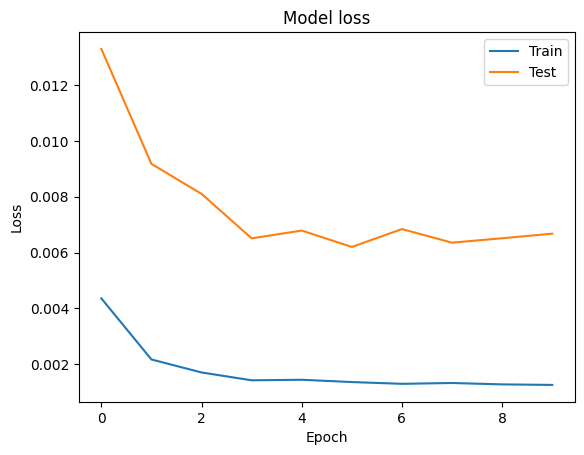

In [101]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

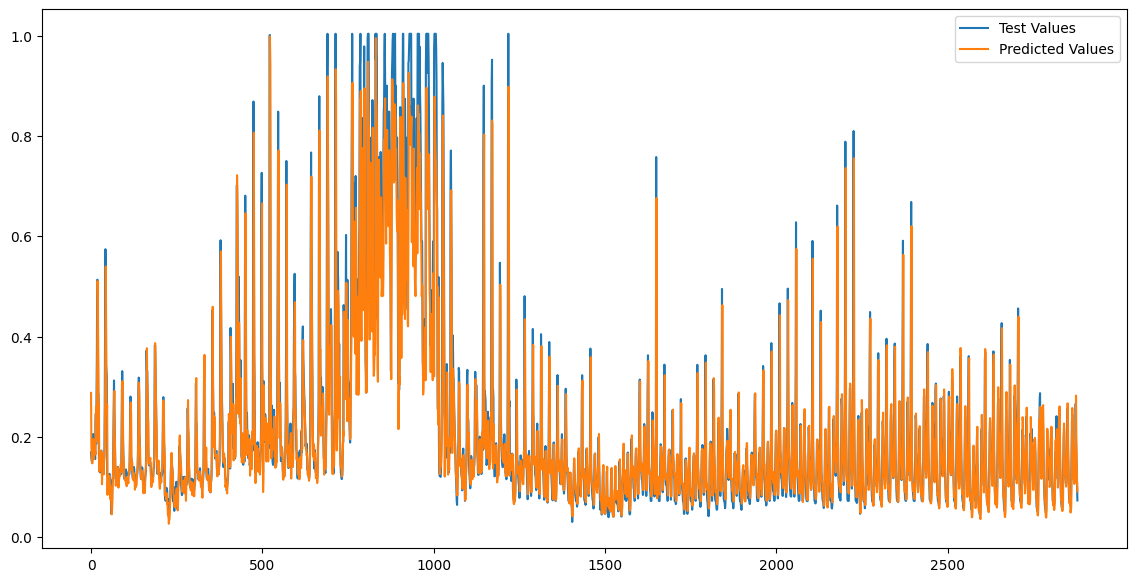

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(testY, label='Test Values')
plt.plot(testPredict, label='Predicted Values')
plt.legend()
plt.xticks(range(0, len(testY), 500))  
plt.show()


In [111]:
print('dataset shape:', dataset.shape)
print('train shape:', train.shape)


dataset shape: (8760, 6)
train shape: (5869, 6)


In [113]:
# Get the last 'look_back' days of data from the dataset
input_data = dataset[-look_back:, :n_features]

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Reshape the input data to match the model's input shape
input_data_reshaped = np.reshape(input_data_scaled, (1, look_back, n_features))

# Predict the (n+1)th day price
predicted_price_scaled = model.predict(input_data_reshaped)

# Inverse transform the predicted price
predicted_price = scaler.inverse_transform([[0] * (n_features - 1) + [predicted_price_scaled[0, 0]]])

# Print the predicted price for the (n+1)th day
print('Predicted price for (n+1)th day:', predicted_price[0][-1])


1/1 [==============================] - 0s 24ms/step
Predicted price for (n+1)th day: 1817.3398639769855
